## Lab 2B: Ideal Gas Law (Constant Temperature)
<bk>

Shreya Parjan
<bk>
9/17/18

The objective of this lab is to explore the relationship between pressure and volume at constant temperature using the Ideal Gas Law. By collecting readings on the pressure of a gas at various volumes, we can quantify the indirect relationship between temperature and volume of a gas at constant pressure. We know that the pressure of a gas will increase when it is confined to a smaller volume because individual gas molecules will be forced closer together while the pressure will decrease when the gas is in a larger volume because the distance between individual molecules will increase on average.

### We will always be using numpy, matplotlib.pyplot and %matplotlib inline, so import them here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m

%matplotlib inline

### Enter data. Use descriptive names and include the units as a comment. 

In [19]:
volume = np.array([5,7,8,10,11,13,15,17,20]) #cm^3
pressure = np.array([232.4,158.78,137.55,101.42,88.52,75.67,63.64,58.12,46.26]) #kPa

#volume of air inside pressure sensor
sensorVolume = 3.0 #cm^3

### Analysis Code.  Use comments to document the code. If the code is long, break it up into different cells. This helps you to check small parts of the code without having to run the entire thing. It saves time and makes it easier to read.

In [20]:
#calculates actual total volume including that inside pressure sensor
totalVolume = np.ones(9)
for i in range(len(totalVolume)):
    totalVolume[i] = volume[i]+sensorVolume
#print(totalVolume)

### Graphs with axes labeled. 

constant =  6498.369033626498
power =  -1.607307624703139
uncertainties:  [5.83861495e+02 3.82270915e-02]


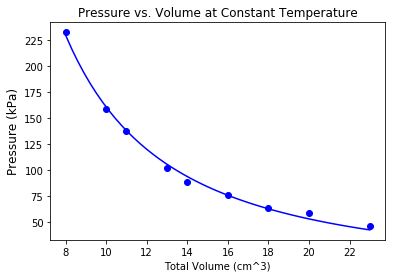

In [21]:
#creates a function for an inverse relationship between volume and pressure
def inverse(x, constant, power):
    return (constant*x**power)

popt, pcov = scipy.optimize.curve_fit(inverse, totalVolume, pressure)
constant = popt[0]
power = popt[1]
print('constant = ',constant)
print('power = ',power)

totalVolume_for_plot = np.linspace(totalVolume.min(), totalVolume.max(), 50)
best_fit_line = inverse(totalVolume_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(totalVolume, pressure, 'bo') #without '-' after bo, plots points alone
plt.plot(totalVolume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume (cm^3)') # label the x-axis
plt.ylabel('Pressure (kPa)', size=12) # label the y-axis

plt.title('Pressure vs. Volume at Constant Temperature') # title
plt.show()

### Answers to questions and conclusions from the lab.

From the initial graph, with a line of best fit drawn in, it's clear that the data follows a trend of exponential decay rather than a linear one. This suggests that volume is inversely proportional to pressure at constant temperature. The pressure will not reach 0 because it is impossible to have a gas occupy an infinitely large volume. It is infeasible for the volume to reach 0 because this would indicate that the gas is compressed to an extremely high pressure.

One attempt to linearize the graph would be to plot the pressure per unit of inverse volume (graphed below). Given a value for volume raised to a negative exponent, in our case -1.607, this shows that the pressure is indirectly proportional to volume. By applying this transformation, we linearize the curve and create a direct relationship (evidenced by the positive slope of the line) between the inverse of the volume and the pressure.

Rename the Notebook and download it as a Notebook (.ipynb).
<bk>
Send to your Dropbox.

y-intercept =  1.5384472870103902
slope =  6425.4157339727535
uncertainties:  [  2.58098423 138.77665963]


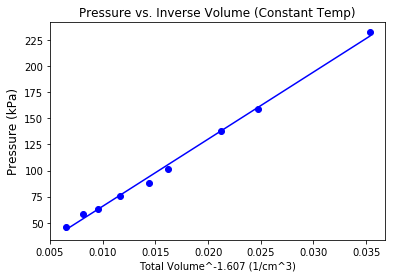

In [22]:
#calculates volume^power at a given data point
inverseVolume = np.ones(9)
for i in range(len(inverseVolume)):
    inverseVolume[i] = totalVolume[i]**power

def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, inverseVolume, pressure)
yIntercept = popt[0]
slope = popt[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

volume_for_plot = np.linspace(inverseVolume.min(), inverseVolume.max(), 50)
best_fit_line = straight_line_model(volume_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(inverseVolume, pressure, 'bo') #without '-' after bo, plots points alone
plt.plot(volume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume^-1.607 (1/cm^3)') # label the x-axis
plt.ylabel('Pressure (kPa)', size=12) # label the y-axis

plt.title('Pressure vs. Inverse Volume (Constant Temp)') # title
plt.show()